In [439]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, auc

In [516]:
df = pd.read_csv("C://workspace//project_data//lata//d_final.csv")
df.head()

,id,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,...,tobacco,contact_other_covid,covid_res,icu,DEATH,d_ent,d_sym,d_last,diff_days,age_grp
0,167386,1,2,2,54,2,2,2,2,2,...,2,3,1,2,0,2020-04-06,2020-04-01,2020-06-29,89,3.0
1,0b5948,2,2,1,30,2,2,2,2,2,...,2,3,1,2,0,2020-04-17,2020-04-10,2020-06-29,80,2.0
2,0d01b5,1,2,2,60,2,1,2,2,2,...,2,3,1,2,1,2020-04-13,2020-04-13,2020-04-22,9,4.0
3,1beec8,2,2,1,47,2,1,2,2,2,...,2,3,1,1,1,2020-04-16,2020-04-16,2020-04-29,13,3.0
4,1.75E+56,2,2,2,63,2,2,2,2,2,...,2,3,1,2,0,2020-04-22,2020-04-13,2020-06-29,77,4.0


In [517]:
df.describe()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,...,obesity,cardiovascular,renal_chronic,tobacco,contact_other_covid,covid_res,icu,DEATH,diff_days,age_grp
count,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,...,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000,121395.000000
mean,1.599374,1.919198,1.394950,52.957577,1.992561,1.714560,1.959776,1.979027,1.966770,1.674105,...,1.799275,1.953655,1.945583,1.917081,2.367676,1.557519,1.917987,0.266914,32.845092,3.187380
std,0.490027,0.276166,0.488859,19.237785,0.100507,0.463632,0.219534,0.173651,0.208078,0.479277,...,0.413378,0.234145,0.247939,0.294203,0.718388,0.694507,0.278025,0.442349,27.360004,0.970514
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,42.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,11.000000,3.000000
50%,2.000000,2.000000,1.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,0.000000,24.000000,3.000000
75%,2.000000,2.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,49.000000,4.000000
max,2.000000,3.000000,3.000000,118.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,180.000000,5.000000


In [518]:
t_train_raw = df[['sex', 'intubed','age_grp','pneumonia','pregnancy', 'diabetes', 'copd', 'asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']]
target_raw = df['DEATH']

In [519]:
## 정규화 적용
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(t_train_raw)
x_train_raw = pd.DataFrame(x_scaled)


## train/test 셋 분리
x_train, x_test, target_train, target_test = \
    train_test_split(x_train_raw, 
                     target_raw, 
                     shuffle = True,
                     test_size=0.2,
                     random_state = 1004)

## 텐서후로우 로지스틱 리그레션

In [520]:
dataset = tf.data.Dataset.from_tensor_slices((x_train.values, target_train.values))

for feat, targ in dataset.take(5):
    print('Festures: {}, Target: {}'.format(feat, targ))

Festures: [0.   0.5  0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  1.   0.   0.5 ], Target: 0
Festures: [0.  0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 0.  0.5 0.  0.5 0.5 0.5 1.  0.  0.5], Target: 0
Festures: [1.   0.5  0.75 0.   0.5  0.   0.5  0.5  0.5  0.   0.5  0.5  0.5  0.5
 0.5  1.   0.5  0.5 ], Target: 1
Festures: [0.   0.5  0.75 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.   0.5 ], Target: 0
Festures: [1.   0.   0.75 0.   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.   0.   0.  ], Target: 0


In [521]:
train_dataset = dataset.batch(100)


## 4개 히든층, 각각 10개, 8개, 4개, 1개 출력부, relu와 sigmoid 함수적용 

def get_compiled_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, kernel_initializer='glorot_uniform',\
                             activation='relu'),
        tf.keras.layers.Dense(256, activation='sigmoid'),
        tf.keras.layers.Dense(128, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                 metrics=['binary_accuracy'])
    return model

In [ ]:
## 학습과 동시에 검증을 하도록 구성하였읍니다

model = get_compiled_model()

hist = model.fit(train_dataset, epochs=15,
         validation_data=(x_test, target_test),
         validation_steps=100,
         verbose=2)         

Train for 972 steps, validate on 24279 samples
Epoch 1/15
972/972 - 3s - loss: 0.4900 - binary_accuracy: 0.7649 - val_loss: 0.4855 - val_binary_accuracy: 0.7668
Epoch 2/15
972/972 - 2s - loss: 0.4803 - binary_accuracy: 0.7714 - val_loss: 0.4828 - val_binary_accuracy: 0.7685
Epoch 3/15
972/972 - 2s - loss: 0.4788 - binary_accuracy: 0.7720 - val_loss: 0.4812 - val_binary_accuracy: 0.7689
Epoch 4/15
972/972 - 2s - loss: 0.4779 - binary_accuracy: 0.7727 - val_loss: 0.4806 - val_binary_accuracy: 0.7700
Epoch 5/15
972/972 - 2s - loss: 0.4773 - binary_accuracy: 0.7731 - val_loss: 0.4803 - val_binary_accuracy: 0.7695
Epoch 6/15
972/972 - 2s - loss: 0.4768 - binary_accuracy: 0.7735 - val_loss: 0.4804 - val_binary_accuracy: 0.7692
Epoch 7/15
972/972 - 2s - loss: 0.4763 - binary_accuracy: 0.7736 - val_loss: 0.4806 - val_binary_accuracy: 0.7691
Epoch 8/15
972/972 - 2s - loss: 0.4760 - binary_accuracy: 0.7738 - val_loss: 0.4808 - val_binary_accuracy: 0.7687
Epoch 9/15
972/972 - 2s - loss: 0.4756 - 

In [447]:
## 위에서 검증데이터를 평가해보았지만 또 한번 해본결과

score = model.evaluate(x_test, target_test, verbose=2)

24279/24279 - 1s - loss: 0.4825 - binary_accuracy: 0.7686


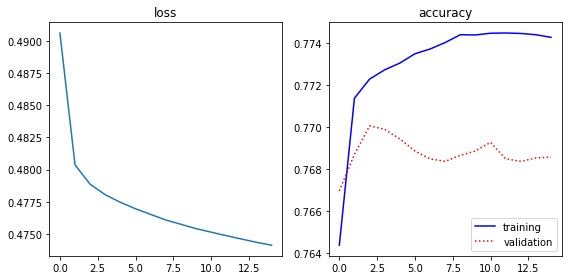

In [507]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1,2,2)
plt.title("accuracy")
plt.plot(hist.history['binary_accuracy'], 'b-', label="training")
plt.plot(hist.history['val_binary_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()

### classification_report

In [508]:
target_pred = model.predict(x_test)

# target_pred 의 결과는 float 형식으로 반환된다
# One hot encoding 변환이 필요하며, 패키지 도움 없이 아래와 같이 변환할 수 있다

df_pred = pd.DataFrame(target_pred, columns=['Y_pred'])
Y_pred = df_pred['Y_pred'].apply(lambda x : 1 if x >= 0.5 else 0)

In [509]:
print(classification_report(target_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     17772
           1       0.63      0.33      0.43      6507

    accuracy                           0.77     24279
   macro avg       0.71      0.63      0.64     24279
weighted avg       0.75      0.77      0.74     24279



* 생존(0) 이라고 예측한 데이터의 79%만 실제로 생존 (precision)
* 사망(1) 이라고 예측한 데이터의 63%만 실제로 사망
* 실제 생존인 데이터중의 93%가 생존으로 예측되었음 (recall)
* 실제 사망인 데이터중의 33%만 사망으로 예측되었음
* 모델 정확도 77%

In [512]:
print('accuracy : %.3f' % accuracy_score(y_true = target_test, y_pred=Y_pred))
print('recall : %.3f' % recall_score(y_true = target_test, y_pred=Y_pred))
print('f1_score : %.3f' % f1_score(y_true = target_test, y_pred=Y_pred))

accuracy : 0.769
recall : 0.327
f1_score : 0.431


In [513]:
f_value = model.predict_proba(x_test)

In [514]:
fpr, tpr, thresholds = roc_curve(target_test, f_value[:,0])
fpr, tpr, thresholds

(array([0.00000000e+00, 1.12536574e-04, 1.12536574e-04, ...,
        9.99606122e-01, 9.99774927e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 3.07361303e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.7796165 , 0.7796165 , 0.77672946, ..., 0.00783087, 0.00782301,
        0.00735432], dtype=float32))

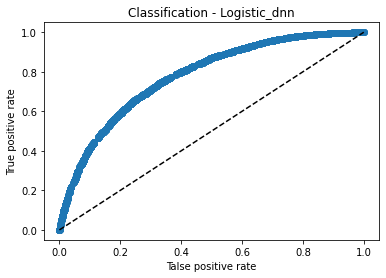

In [515]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression (AUC=%0.3f)")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Talse positive rate')
plt.ylabel('True positive rate')
plt.title('Classification - Logistic_dnn')
plt.show()

In [454]:
print('AUC : %.3f' % auc(fpr, tpr))

AUC : 0.779


In [455]:
d_tpr = pd.DataFrame({'tpr':tpr} )
d_fpr = pd.DataFrame({'fpr':fpr} )

In [456]:
clf_LRdnn = pd.concat([d_tpr, d_fpr], axis = 1)
clf_LRdnn

,tpr,fpr
0,0.000000,0.000000
1,0.000000,0.000113
2,0.000307,0.000113
3,0.000461,0.000169
4,0.001076,0.000169
...,...,...
4567,1.000000,0.998087
4568,1.000000,0.998256
4569,1.000000,0.999606
4570,1.000000,0.999775


In [457]:
clf_LRdnn.to_csv("C://workspace//project_data//lata//processed//clf_LRdnn.csv", encoding='utf-8', index=False, line_terminator='\n')

## ==========================================

## 로지스틱 모델: sklearn 사용

In [458]:
from sklearn.linear_model import LogisticRegression

* 모델 생성 및 예측

In [459]:
model1 = LogisticRegression()
skl_model = model1.fit(x_train, target_train)
print(model1.score(x_train, target_train))

0.7706454137320318


* 변수의 계수 확인

In [460]:
print(model1.coef_)

[[ 0.24382325 -3.24616662  2.26895069 -1.47764378  1.02885684 -0.31457217
   0.16896247  0.57557721 -0.20514757 -0.18830546 -0.32145499  0.15762325
  -0.19474336 -0.53913064  0.17613582  1.43251355 -1.57323885 -0.10043573]]


* 테스트 데이터 예측하기

In [505]:
target_pred1 = model1.predict(x_test)
target_pred1.shape

(24279,)

* 예측된 테스트 데이터 검증

In [462]:
accuracy_score(target_test, target_pred1)

0.7652703982865852

### classification_report

In [463]:
print(classification_report(target_test, target_pred1, target_names= \
                            ['pred_alive(0)', 'pred_dead(1)']))

               precision    recall  f1-score   support

pred_alive(0)       0.79      0.93      0.85     17772
 pred_dead(1)       0.62      0.31      0.42      6507

     accuracy                           0.77     24279
    macro avg       0.71      0.62      0.63     24279
 weighted avg       0.74      0.77      0.74     24279



* 생존(0) 이라고 예측한 데이터의 79%만 실제로 생존 (precision)
* 사망(1) 이라고 예측한 데이터의 62%만 실제로 사망
* 실제 생존인 데이터중의 93%가 생존으로 예측되었음 (recall)
* 실제 사망인 데이터중의 31%만 사망으로 예측되었음
* 모델 정확도 77%

In [464]:
f_value1 = model1.decision_function(x_test)

In [465]:
dataseed = pd.DataFrame(np.vstack([f_value1, target_pred1, target_test]).T, columns=["F", "target_pred", "target_test"])
dataseed.sort_values("F", ascending=False).reset_index(drop=True)

,F,target_pred,target_test
0,2.962395,1.0,1.0
1,2.739984,1.0,1.0
2,2.645831,1.0,1.0
3,2.535544,1.0,1.0
4,2.535544,1.0,0.0
...,...,...,...
24274,-5.489258,0.0,0.0
24275,-5.537745,0.0,0.0
24276,-5.617178,0.0,0.0
24277,-5.652947,0.0,0.0


In [393]:
confusion_matrix(target_test, target_pred1, labels=[1, 0])

array([[ 2022,  4485],
       [ 1214, 16558]], dtype=int64)

In [394]:
recall1 = 2616 / (2616 + 5473)
fallout1 = 1489 / (1489 + 20771)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.32340215106935344
fallout = 0.06689128481581312


In [395]:
fpr1, tpr1, thresholds1 = roc_curve(target_test, f_value1)
fpr1, tpr1, thresholds1

(array([0.        , 0.        , 0.        , ..., 0.99977493, 0.99988746,
        1.        ]),
 array([0.00000000e+00, 1.53680652e-04, 4.61041955e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([ 3.96239511,  2.96239511,  2.64583088, ..., -5.48925843,
        -5.6171781 , -5.65294717]))

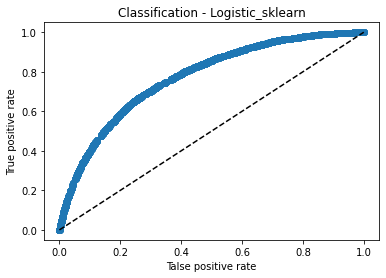

In [396]:
plt.plot(fpr1, tpr1, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Talse positive rate')
plt.ylabel('True positive rate')
plt.title('Classification - Logistic_sklearn')
plt.show()

In [397]:
print('AUC : %.3f' % auc(fpr, tpr))

AUC : 0.772


#### TPR, FPR export

In [340]:
d_tpr1 = pd.DataFrame({'tpr':tpr1})
d_fpr1 = pd.DataFrame({'fpr':fpr1})

In [341]:
clf_LRskl = pd.concat([d_tpr1, d_fpr1], axis = 1)
clf_LRskl

,tpr,fpr
0,0.000000,0.000000
1,0.000154,0.000000
2,0.000461,0.000000
3,0.000615,0.000056
4,0.000922,0.000056
...,...,...
4447,1.000000,0.999494
4448,1.000000,0.999662
4449,1.000000,0.999775
4450,1.000000,0.999887


In [342]:
clf_LRskl.to_csv("C://workspace//project_data//lata//processed//clf_LRskl.csv", encoding='utf-8', index=False, line_terminator='\n')